<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/El_bueno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [475]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [476]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,  GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [477]:
from google.colab import files
data_to_load = files.upload()

Saving Resumen_petroleo.csv to Resumen_petroleo (9).csv


In [478]:
df = pd.read_csv('Resumen_petroleo.csv', index_col='Fecha', parse_dates=True)
df.shape

(318, 6)

In [479]:
from sklearn.metrics import mean_absolute_percentage_error
from typing import ValuesView

In [480]:
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

In [481]:
df['Log_MM'] = np.log(df['MM'])
df['Log_WTI'] = np.log(df['WTI'])
df['Log_Brent'] = np.log(df['BRENT'])
df['Log_DJI'] = np.log(df['DJI'])
df['Log_XAU'] = np.log(df['XAU'])
df['Log_Oil C1'] = np.log(df['Oil C1'])

In [482]:
train

,MM,WTI,BRENT,DJI,XAU,Oil C1,Log_MM,Log_WTI,Log_Brent,Log_DJI,Log_XAU,Log_Oil C1,DiffLogMM,DiffLogWTI,DiffLogBRENT,DiffLogDJI,DiffLogXAU,DiffLogOil C1
Fecha,,,,,,,,,,,,,,,,,,
1996-01-31,15.12,17.76,16.63,5395.30,406.45,17.74,2.716018,2.876949,2.811208,8.593283,6.007461,2.875822,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-29,16.82,19.59,18.80,5485.62,399.75,19.54,2.822569,2.975019,2.933857,8.609885,5.990839,2.972464,0.106550,0.098070,0.122649,0.016602,-0.016622,0.096642
1996-03-29,18.35,21.43,20.33,5587.14,395.45,21.47,2.909630,3.064792,3.012098,8.628223,5.980024,3.066657,0.087061,0.089773,0.078241,0.018337,-0.010815,0.094193
1996-04-30,17.61,20.95,19.50,5569.07,391.65,21.20,2.868467,3.042139,2.970414,8.624983,5.970369,3.054001,-0.041163,-0.022653,-0.041683,-0.003239,-0.009656,-0.012655
1996-05-31,16.48,19.77,18.10,5643.17,391.00,19.76,2.802148,2.984166,2.895912,8.638201,5.968708,2.983660,-0.066319,-0.057973,-0.074503,0.013218,-0.001661,-0.070341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-31,95.58,91.93,100.43,15115.57,1386.90,91.97,4.559964,4.521027,4.609461,9.623481,7.234826,4.521462,-0.036771,-0.013935,-0.010893,0.018413,-0.063010,-0.016071
2013-06-28,96.30,96.36,102.49,14909.60,1234.25,96.56,4.567468,4.568091,4.629765,9.609761,7.118219,4.570165,0.007505,0.047064,0.020304,-0.013720,-0.116608,0.048702
2013-07-31,100.87,105.10,107.89,15499.54,1323.10,105.03,4.613833,4.654912,4.681112,9.648566,7.187733,4.654246,0.046364,0.086821,0.051347,0.038805,0.069514,0.084081


In [483]:
df['DiffLogMM'] = df['Log_MM'].diff() #crea una nueva columna con la diferencia del logaritmo 
df['DiffLogWTI'] = df['Log_WTI'].diff()
df['DiffLogBRENT'] = df['Log_Brent'].diff()
df['DiffLogDJI'] = df['Log_DJI'].diff()
df['DiffLogXAU'] = df['Log_XAU'].diff()
df['DiffLogOil C1'] = df['Log_Oil C1'].diff()

In [484]:
input_data = df[['DiffLogWTI','DiffLogBRENT','DiffLogDJI', 'DiffLogXAU','DiffLogOil C1']].values
targets = df['DiffLogMM'].values

In [485]:
input_data = df[['DiffLogWTI','DiffLogBRENT','DiffLogDJI', 'DiffLogXAU','DiffLogOil C1']].dropna()
targets = df['DiffLogMM'].dropna()

In [486]:
print(input_data.shape, targets.shape)

(317, 5) (317,)


In [487]:
# Now make the actual data which will go into the neural network
T = 12 #the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1] #en este ejemplo son 5 porque usamos 5 variables disitntas
N = len(input_data) - T # (e.g. if T = 10 and you have 11 data points then you'd onlye have 1 sample )
print(T,D,N, len(input_data)*1//3)

12 5 305 105


In [488]:
Ntest = len(input_data) * 1//3
train = df.iloc[:-Ntest] #todos -12
test = df.iloc[-Ntest:] #solo las últimas 12 observaciones

In [489]:
# boolean series to index df rows []
train_idx = df.index <= train.index[-1] #pone true a lo que sea train del data set y lo demás false
test_idx = df.index > train.index[-1] # pone true a lo que sea del test solamente y lo demás false
print(train_idx.shape, test_idx.shape)

(318,) (318,)


In [490]:
print(train_idx,len(input_data) - Ntest)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [491]:
# normalize the inputs
Ntrain = len(input_data) * 2//3 - T + 1 #// Ntrain = len(input_data) * 2//3  sin el -T es el orignal
print(Ntrain)

200


In [492]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249,5,10)
Y_train = np.zeros(Ntrain)

for t in range(Ntrain): 
  X_train[t, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables // X_train[t, :, :] = input_data[t:t+T] 
  Y_train[t] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [504]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain + T, T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249-2/3 Ntrain ,5,10) // original : X_test = np.zeros((N - Ntrain, T, D)) 
Y_test = np.zeros(N - Ntrain + T) # (1249-839) //original : Y_test = np.zeros(N - Ntrain ) // el original: Y_test = np.zeros(N - Ntrain + T) 

#Acá llenamos los ceros generados
for u in range(N - Ntrain): 
  # u ocunts from 0... (N - Ntrain)
  # t counts form Ntrain...N 
  t = u + Ntrain #(U toma de 0 hasta N, Ntrain siempre es 839)
  X_test[u, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables
  Y_test[u] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [505]:
print(X_train)

[[[ 0.09807049  0.12264858  0.01660192 -0.01662157  0.09664167]
  [ 0.08977258  0.07824076  0.01833741 -0.01081499  0.09419297]
  [-0.02265316 -0.04168316 -0.00323945 -0.00965577 -0.01265543]
  ...
  [ 0.01916992  0.0160978   0.07849089 -0.01748226  0.01149683]
  [ 0.08876792  0.03102012 -0.01132475 -0.00906085  0.09292106]
  [-0.06995859 -0.02628384  0.05503397 -0.06656022 -0.07073049]]

 [[ 0.08977258  0.07824076  0.01833741 -0.01081499  0.09419297]
  [-0.02265316 -0.04168316 -0.00323945 -0.00965577 -0.01265543]
  [-0.05797301 -0.07450253  0.01321789 -0.00166102 -0.07034149]
  ...
  [ 0.08876792  0.03102012 -0.01132475 -0.00906085  0.09292106]
  [-0.06995859 -0.02628384  0.05503397 -0.06656022 -0.07073049]
  [-0.17366349 -0.18026182  0.00944436  0.05343272 -0.17366349]]

 [[-0.02265316 -0.04168316 -0.00323945 -0.00965577 -0.01265543]
  [-0.05797301 -0.07450253  0.01321789 -0.00166102 -0.07034149]
  [ 0.05654     0.06315635  0.00202695 -0.0273528   0.05704595]
  ...
  [-0.06995859 -0.

In [506]:
#RNN 
i = Input(shape=(T,D))
x = LSTM(6)(i)
x = Dense(1)(x)
model = Model(i,x)

In [507]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 12, 5)]           0         
                                                                 
 lstm_16 (LSTM)              (None, 6)                 288       
                                                                 
 dense_16 (Dense)            (None, 1)                 7         
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [508]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [509]:
print(X_test.shape)

(117, 12, 5)


In [510]:
print(Y_test.shape)

(117,)


In [511]:
print(X_train.shape, Y_train.shape)

(200, 12, 5) (200,)


In [512]:
print(X_test.shape, Y_test.shape)

(117, 12, 5) (117,)


In [513]:
r = model.fit(
    X_train,
    Y_train,
    epochs=100,
    validation_data=(X_test,Y_test),
)

Epoch 1/100
7/7 [==============================] - 3s 94ms/step - loss: 0.5671 - val_loss: 0.5241
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5482 - val_loss: 0.5067
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.5294 - val_loss: 0.4886
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5099 - val_loss: 0.4691
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4885 - val_loss: 0.4474
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4642 - val_loss: 0.4231
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4362 - val_loss: 0.3958
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.4044 - val_loss: 0.3653
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3716 - val_loss: 0.3315
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.3320 - val_loss: 0.2980
Epoch 11/100
7/7 [=

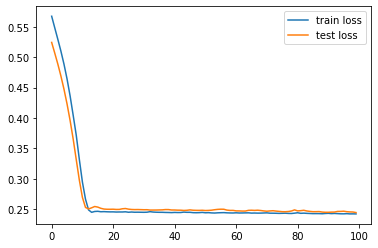

In [514]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [515]:
train_idx[:T+1] = False # First T+1 values are not predictable

In [516]:
print(train_idx[:T+1]) #Me imprime lo que tenemos False en el entrenamiento 

[False False False False False False False False False False False False
 False]


In [517]:
Ptrain = model.predict(X_train).flatten()
Ptest = model.predict(X_test).flatten()

4/4 [==============================] - 0s 4ms/step


In [518]:
print(Ptrain.shape)

(200,)


In [519]:
print(Ptest.shape)

(117,)


In [520]:
print(input_data.shape)

(317, 5)


In [521]:
199+118

317

In [522]:
#Needed to compute un-differenced predictions
df['ShiftLogMM'] = df['Log_MM'].shift(1) #cambia 1 periodo hacia adelante los datos
prev = df['ShiftLogMM']
ValuesView(prev.tail())

ValuesView(Fecha
2022-02-28    4.420165
2022-03-31    4.519612
2022-04-29    4.584967
2022-05-31    4.625169
2022-06-30    4.734706
Name: ShiftLogMM, dtype: float64)

In [523]:
print(Ptrain.shape, prev[train_idx].shape)

(200,) (200,)


In [524]:
# Last-known train value
last_train = train.iloc[-1]['Log_MM']

In [525]:
ValuesView(last_train)

ValuesView(4.584355046274172)

In [526]:
# 1-step forecast[]
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain #Te regresa las 121 observaciones con true //con el loc me regresa del df algo en específico //prev[train_idx] =121 lenght + 121 lenght ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest #Te regresa las 12 observaciones con true // prev[test_idx] 12 lenght + ptest 12 lenght

ValueError: ignored